In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from triangle import triangulate, plot as tplot, convex_hull, show_data, get_data

In [2]:
t = np.linspace(0, 2*np.pi, 40, endpoint=False)
points = np.stack((np.cos(t), np.sin(t))).T

In [3]:
seg = np.array([[j, j+1] for j in range(points.shape[0]-1)] + [[points.shape[0] - 1, 0]])

# Mesh 

In [4]:
cndt = triangulate({'vertices':points, 'segments':seg}, opts='Rpq30a0.01ne')

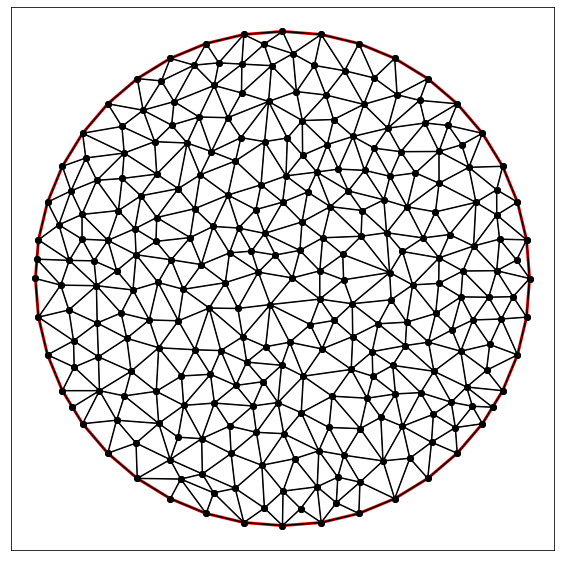

In [5]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.subplot(111, aspect='equal')
tplot(ax, **cndt)
# fig.savefig('../images/circle_mesh')
plt.show()

In [20]:
points = cndt['vertices']
triangles = cndt['triangles']
neighbours = cndt['neighbors']
triangles_s = points[triangles]
triangles_c = triangles_s.reshape(-1, 2)
vertice_maker_is_boundary = cndt["vertex_markers"]

In [21]:
matrix = np.zeros((points.shape[0], points.shape[0]), dtype=np.float64)
b = np.zeros(points.shape[0])
f = np.ones(points.shape[0]) * 2
# f = c

for idx, element in enumerate(triangles):
    
    x1, x2, x3 = points[element[0], 0], points[element[1], 0], points[element[2], 0]
    y1, y2, y3 = points[element[0], 1], points[element[1], 1], points[element[2], 1]
    
    delta = (x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)

    if vertice_maker_is_boundary[element[0]] == True:
        matrix[element[0], element[0]] = 1
        b[element[0]] = 0
    else:

        matrix[element[0], element[0]] += 2 * (points[element[1], 1] - points[element[2], 1])*(points[element[1], 1] - points[element[2], 1]) / delta
        matrix[element[0], element[1]] += 2 * (points[element[1], 1] - points[element[2], 1])*(points[element[2], 1] - points[element[0], 1]) / delta
        matrix[element[0], element[2]] += 2 * (points[element[1], 1] - points[element[2], 1])*(points[element[0], 1] - points[element[1], 1]) / delta

        matrix[element[0], element[0]] += 2 * (points[element[1], 0] - points[element[2], 0])*(points[element[1], 0] - points[element[2], 0]) / delta
        matrix[element[0], element[1]] += 2 * (points[element[1], 0] - points[element[2], 0])*(points[element[2], 0] - points[element[0], 0]) / delta
        matrix[element[0], element[2]] += 2 * (points[element[1], 0] - points[element[2], 0])*(points[element[0], 0] - points[element[1], 0]) / delta

        b[element[0]] -= 2 * delta / 3 * f[element[0]]

    if vertice_maker_is_boundary[element[1]] == True:
        matrix[element[1], element[1]] = 1
        b[element[1]] *= 0
    else:

        matrix[element[1], element[0]] += 2 * (points[element[2], 1] - points[element[0], 1])*(points[element[1], 1] - points[element[2], 1]) / delta
        matrix[element[1], element[1]] += 2 * (points[element[2], 1] - points[element[0], 1])*(points[element[2], 1] - points[element[0], 1]) / delta
        matrix[element[1], element[2]] += 2 * (points[element[2], 1] - points[element[0], 1])*(points[element[0], 1] - points[element[1], 1]) / delta

        matrix[element[1], element[0]] += 2 * (points[element[2], 0] - points[element[0], 0])*(points[element[1], 0] - points[element[2], 0]) / delta
        matrix[element[1], element[1]] += 2 * (points[element[2], 0] - points[element[0], 0])*(points[element[2], 0] - points[element[0], 0]) / delta
        matrix[element[1], element[2]] += 2 * (points[element[2], 0] - points[element[0], 0])*(points[element[0], 0] - points[element[1], 0]) / delta

        b[element[1]] -= 2 * delta / 3 * f[element[0]]

    if vertice_maker_is_boundary[element[2]] == True:
        matrix[element[2], element[2]] = 1
        b[element[2]] *= 0
    else:
        
        matrix[element[2], element[0]] += 2 * (points[element[0], 1] - points[element[1], 1])*(points[element[1], 1] - points[element[2], 1]) / delta
        matrix[element[2], element[1]] += 2 * (points[element[0], 1] - points[element[1], 1])*(points[element[2], 1] - points[element[0], 1]) / delta
        matrix[element[2], element[2]] += 2 * (points[element[0], 1] - points[element[1], 1])*(points[element[0], 1] - points[element[1], 1]) / delta

        matrix[element[2], element[0]] += 2 * (points[element[0], 0] - points[element[1], 0])*(points[element[1], 0] - points[element[2], 0]) / delta
        matrix[element[2], element[1]] += 2 * (points[element[0], 0] - points[element[1], 0])*(points[element[2], 0] - points[element[0], 0]) / delta
        matrix[element[2], element[2]] += 2 * (points[element[0], 0] - points[element[1], 0])*(points[element[0], 0] - points[element[1], 0]) / delta
    
        b[element[2]] -= 2 * delta / 3 * f[element[0]]

In [22]:
c = np.linalg.solve(matrix, b)

In [23]:
orig = -(1-points[:,0]**2-points[:,1]**2)/4

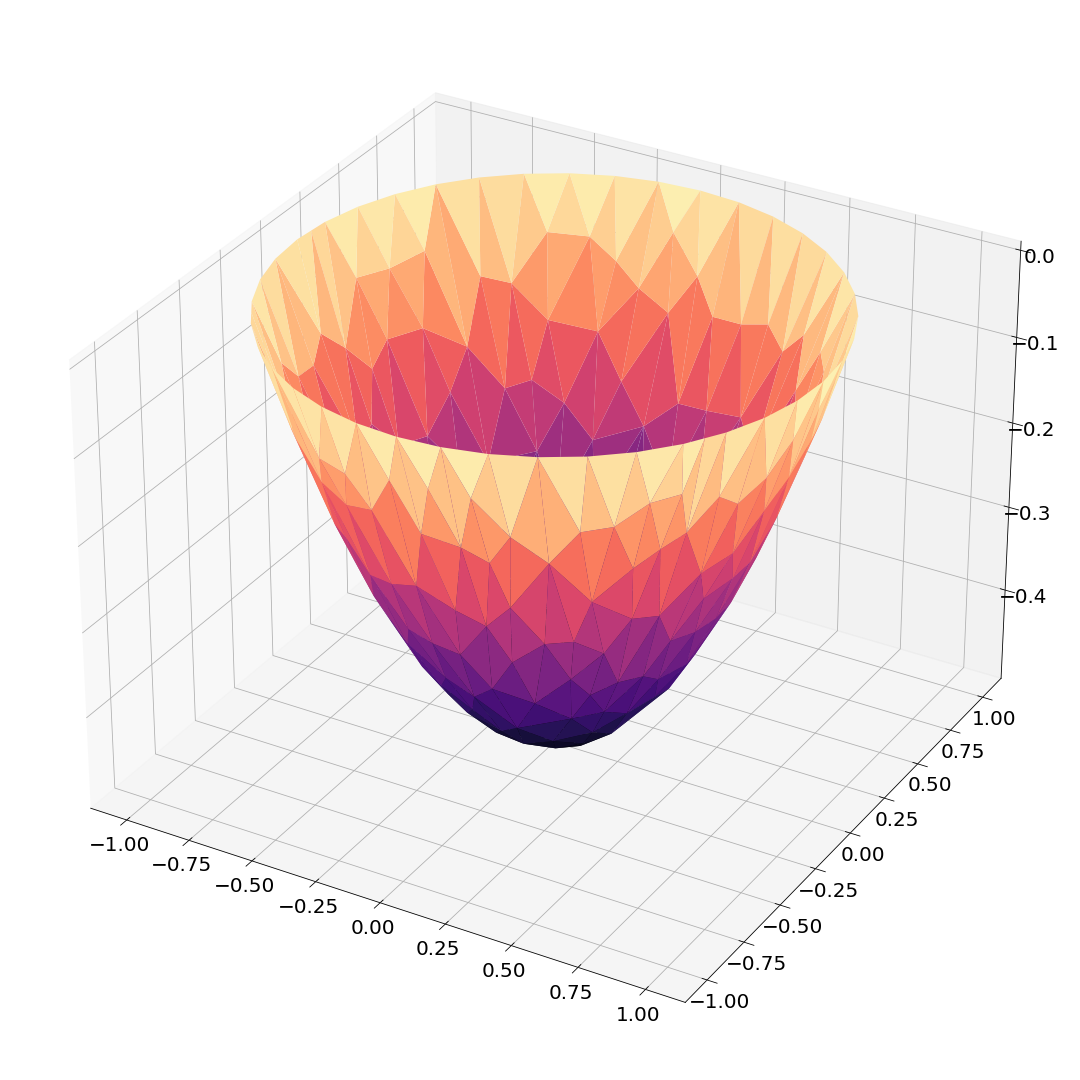

In [26]:
%matplotlib widget
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.zaxis.set_tick_params(labelsize=20)
ax.plot_trisurf(points[:, 0], points[:, 1], c, cmap="magma")
fig.tight_layout()
# fig.savefig('../images/poisson_equation_on_unit_circle_solution')
plt.show()

### Stiffness matrix

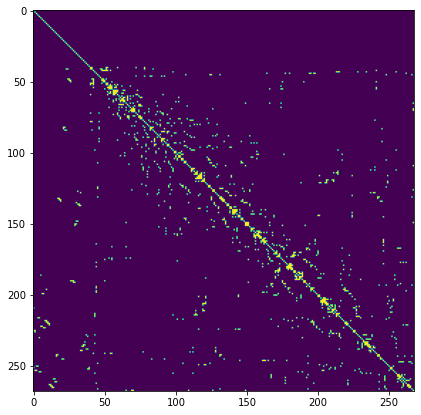

In [52]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(matrix != 0)
plt.show()